In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [22]:
# create engine to hawaii.sqlite
database_path = '/Users/AnthonetteEllen/Desktop/sqlalchemy-challenge/Resources/hawaii.sqlite'
engine = create_engine(f"sqlite:///{database_path}")

In [23]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [27]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [53]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [89]:
# Find the most recent date in the data set.
recentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recentdate

('2017-08-23',)

Text(0.5, 1.0, 'Precipitation Within 12 Months')

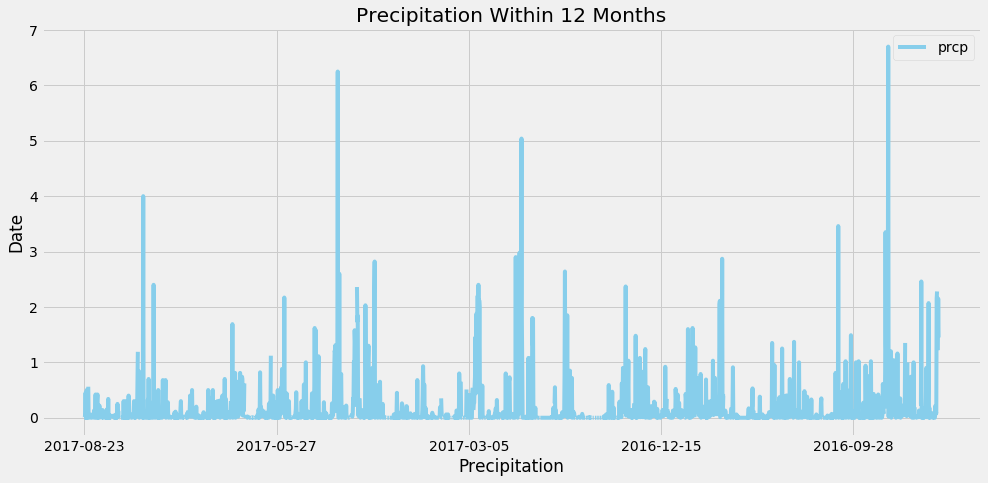

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prcp = session.query(Measurement.date, Measurement.prcp).filter\
(Measurement.date > '2016-08-23').\
order_by(Measurement.date.desc()).all()

prcpdf = pd.DataFrame(prcp, columns=['date', 'prcp'])
prcpdf.set_index('date')
prcpdf.plot(x = 'date', y='prcp', figsize=(15,7), color="skyblue")
plt.xlabel("Precipitation")
plt.ylabel('Date')
plt.title('Precipitation Within 12 Months')

In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpdf.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()